<a href="https://colab.research.google.com/github/ndang6/ColabNoteBook/blob/main/House_pricing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# Exploratory Data Analysis (EAD)

In [ ]:
url = 'https://raw.githubusercontent.com/ndang6/real-estate-data/refs/heads/main/real-estate-data.csv'
df1 = pd.read_csv(url)
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df1.shape

(4600, 18)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data cleaning

In [ ]:
df1.isnull().sum() / len(df1) * 100

,0
date,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2 = df1.drop(['date', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'street', 'country'], axis = 'columns')
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,0,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,0,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,0,1976,1992,Redmond,WA 98052


In [ ]:
df2['zip_code'] = df2['statezip'].apply(lambda x: x.split(' ')[1])
df2 = df2.drop(['statezip'], axis = 'columns')
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,yr_renovated,city,zip_code
0,313000.0,3.0,1.50,1340,7912,0,1955,2005,Shoreline,98133
1,2384000.0,5.0,2.50,3650,9050,0,1921,0,Seattle,98119
2,342000.0,3.0,2.00,1930,11947,0,1966,0,Kent,98042
3,420000.0,3.0,2.25,2000,8030,0,1963,0,Bellevue,98008
4,550000.0,4.0,2.50,1940,10500,0,1976,1992,Redmond,98052


In [ ]:
df2.groupby('zip_code')['zip_code'].agg('count').sort_values(ascending=False)

,zip_code
zip_code,
98103,148
98052,135
98117,132
98115,130
98006,110
...,...
98047,6
98288,3
98050,2


In [ ]:
df2.groupby('city')['city'].agg('count').sort_values(ascending=False)

,city
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Issaquah,187
Kirkland,187
Kent,185
Auburn,176
Sammamish,175


# Feature engineering

In [ ]:
df2['price_per_sqft'] = df2['price'] / df2['sqft_living']
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,yr_renovated,city,zip_code,price_per_sqft
0,313000.0,3.0,1.50,1340,7912,0,1955,2005,Shoreline,98133,233.582090
1,2384000.0,5.0,2.50,3650,9050,0,1921,0,Seattle,98119,653.150685
2,342000.0,3.0,2.00,1930,11947,0,1966,0,Kent,98042,177.202073
3,420000.0,3.0,2.25,2000,8030,0,1963,0,Bellevue,98008,210.000000
4,550000.0,4.0,2.50,1940,10500,0,1976,1992,Redmond,98052,283.505155


In [ ]:
df2[df2.sqft_living/df2.bedrooms < 400].shape

(467, 11)

In [ ]:
df2.price_per_sqft.describe()

,price_per_sqft
count,4600.000000
mean,265.876260
std,357.503344
min,0.000000
25%,180.819021
50%,243.853874
75%,314.843619
max,22533.898305


# Outlier removal

In [ ]:
def remove_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('zip_code'):
    mean = np.mean(subdf.price_per_sqft)
    standard_deviation = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (mean - standard_deviation)) & (subdf.price_per_sqft <= (mean + standard_deviation))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

In [ ]:
df3 = remove_outliers(df2)
df3.shape

(3519, 11)

Text(0, 0.5, 'Count')

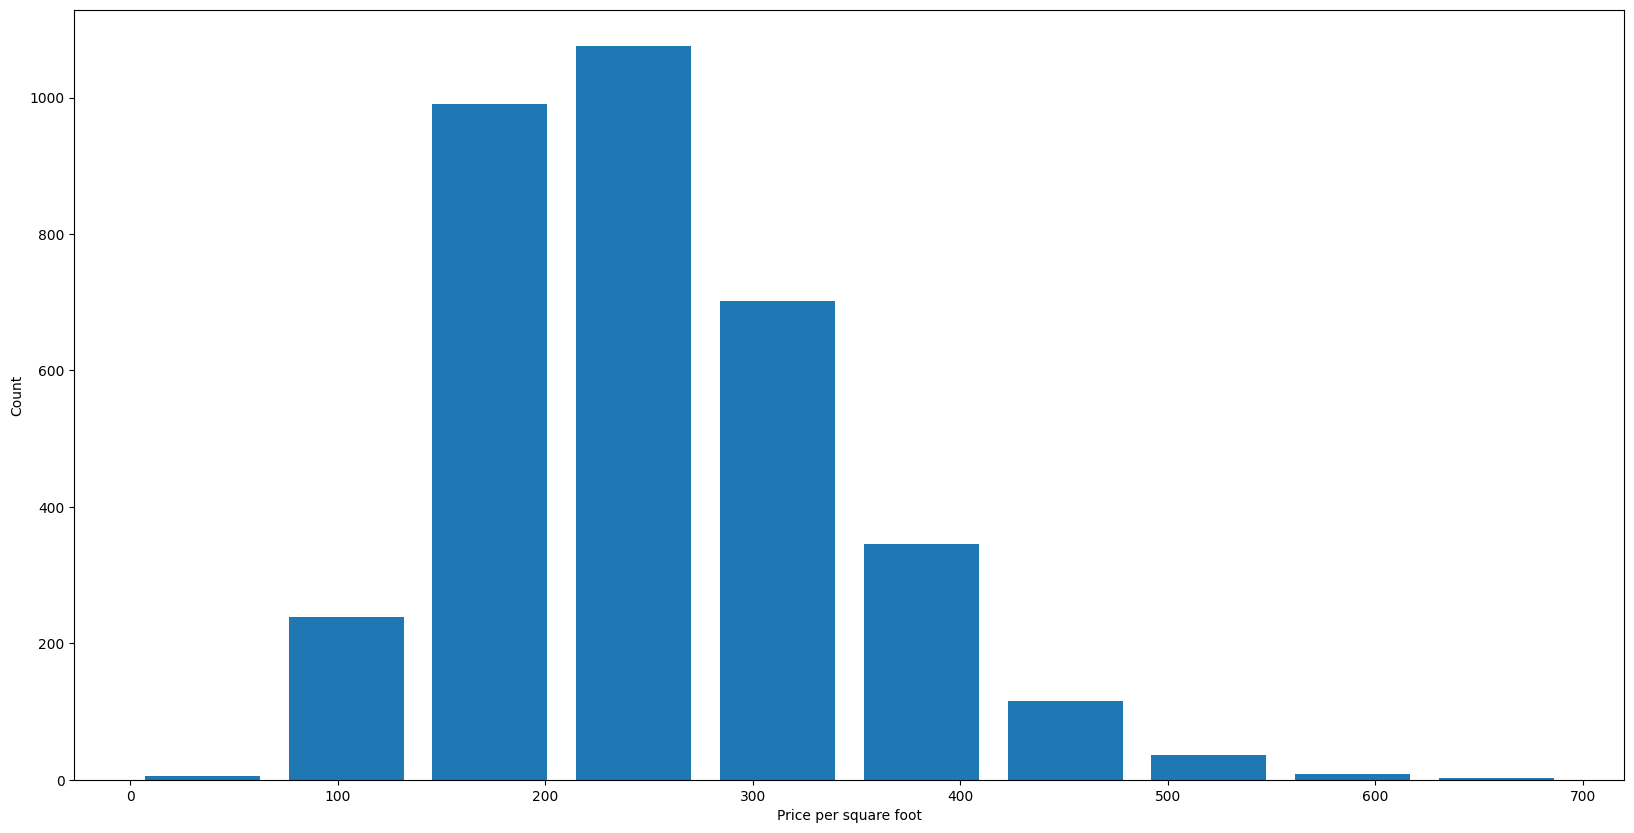

In [ ]:
import matplotlib
plt.hist(df3.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price per square foot')
plt.ylabel('Count')

In [ ]:
city_dummies = pd.get_dummies(df3.city, dtype = 'int', drop_first=True)
city_dummies.head()

,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4 = pd.concat([df3, city_dummies], axis = 'columns')
df4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,yr_renovated,city,zip_code,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville
0,245000.0,3.0,1.75,1920,9306,0,1984,0,Auburn,98001,...,0,0,0,0,0,0,0,0,0,0
1,360000.0,4.0,2.00,2680,18768,0,1965,0,Auburn,98001,...,0,0,0,0,0,0,0,0,0,0
2,197000.0,3.0,1.75,1690,7735,0,1976,1992,Auburn,98001,...,0,0,0,0,0,0,0,0,0,0
3,100000.0,2.0,1.00,910,22000,0,1956,2001,Algona,98001,...,0,0,0,0,0,0,0,0,0,0
4,280000.0,3.0,2.50,1600,4271,0,2000,0,Auburn,98001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,535000.0,4.0,2.25,2980,8051,0,1935,0,Seattle,98199,...,0,0,0,1,0,0,0,0,0,0
3515,584000.0,3.0,1.75,1490,1036,0,2008,0,Seattle,98199,...,0,0,0,1,0,0,0,0,0,0
3516,134000.0,2.0,1.50,980,5000,0,1922,2003,Skykomish,98288,...,0,0,0,0,0,1,0,0,0,0
3517,415000.0,3.0,2.75,2600,64626,0,2009,0,Skykomish,98288,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df5 = df4.drop(['city', 'price_per_sqft', 'waterfront', 'yr_built', 'yr_renovated', 'sqft_lot', 'zip_code'], axis = 'columns')
df5.head()

,price,bedrooms,bathrooms,sqft_living,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville
0,245000.0,3.0,1.75,1920,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,360000.0,4.0,2.00,2680,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,197000.0,3.0,1.75,1690,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100000.0,2.0,1.00,910,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,280000.0,3.0,2.50,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df5.shape

(3519, 45)

In [ ]:
X = df5.drop('price', axis = 'columns')
X.head()

,bedrooms,bathrooms,sqft_living,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,...,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville
0,3.0,1.75,1920,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2.00,2680,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1.75,1690,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.00,910,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.50,1600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df5.price
y.head()

,price
0,245000.0
1,360000.0
2,197000.0
3,100000.0
4,280000.0


# Model building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7857656989044377

In [ ]:
def predict_price(bedrooms, bathrooms, sqft_living, location):
  loc_index = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = bedrooms
  x[1] = bathrooms
  x[2] = sqft_living
  if loc_index >= 0:
    x[loc_index] = 1

  return lr_clf.predict([x])[0]


In [ ]:
# df5[(df5['bedrooms'] == 3) & (df5['bathrooms'] == 3) & (df5['Bellevue'])]

In [ ]:
predict_price(3, 3, 3240, 'Bellevue')

1009078.2833279307

# Based on the model, a house with 3 bedrooms, 3 bathrooms, 3240 living sqft in Bellevue are will have a price around 1 million dollars.